# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
#Note: Since the codes in this and the next section came with the default homework files, no change has been done.
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
#Note: Since the codes in this and the next section came with the default homework files, no change has been done.
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#entering url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [9]:
# Producing lists for different API parameters 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# setting counter 
record = 1

#printing statement
print(f"Beginning Data Retrieval | Cities")
print(f"---------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record}      | {city_record}")
       
        
        # Increasing the counter 
        record= record + 1
           
    # if there is no record, "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval | Cities
---------------------------------
City not found. Skipping...
Processing Record 1      | Tabuk
Processing Record 2      | Castro
Processing Record 3      | Qaanaaq
Processing Record 4      | Bambous Virieux
City not found. Skipping...
Processing Record 5      | Busselton
Processing Record 6      | Lypova Dolyna
Processing Record 7      | Lovozero
Processing Record 8      | Cabo San Lucas
Processing Record 9      | Inhambane
City not found. Skipping...
Processing Record 10      | Chokurdakh
Processing Record 11      | Rikitea
Processing Record 12      | Nemuro
Processing Record 13      | Hilo
Processing Record 14      | Khatanga
Processing Record 15      | Saint-Georges
Processing Record 16      | Kuandian
Processing Record 17      | Atuona
Processing Record 18      | Papara
Processing Record 19      | Mataura
Processing Record 20      | Xichang
Processing Record 21      | Kieta
Processing Record 22      | Ilulissat
Processing Record 23      | Luderitz


Processing Record 194      | Nkhotakota
Processing Record 195      | Sampit
Processing Record 196      | Tupik
City not found. Skipping...
Processing Record 197      | Novo Aripuana
City not found. Skipping...
Processing Record 198      | Awjilah
Processing Record 199      | Katsuura
Processing Record 200      | Leningradskiy
Processing Record 201      | Kirovskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 202      | Blythe
Processing Record 203      | Maiduguri
Processing Record 204      | Trairi
Processing Record 205      | San Quintin
Processing Record 206      | Kaitangata
Processing Record 207      | Palu
Processing Record 208      | Staryy Nadym
Processing Record 209      | Carora
Processing Record 210      | Georgetown
Processing Record 211      | Guantanamo
Processing Record 212      | Xuddur
Processing Record 213      | Komsomolskiy
Processing Record 214      | Aklavik
Processing Record 215      | Itoman
Processing Record 216      | Praia da Vito

Processing Record 388      | Ornskoldsvik
Processing Record 389      | Guadalupe y Calvo
Processing Record 390      | Richards Bay
Processing Record 391      | Quang Ngai
Processing Record 392      | Gold Coast
Processing Record 393      | Lampa
Processing Record 394      | Jinji
Processing Record 395      | Mandan
City not found. Skipping...
Processing Record 396      | Tobol
Processing Record 397      | Honningsvag
Processing Record 398      | Bhag
Processing Record 399      | Methoni
City not found. Skipping...
Processing Record 400      | San Juan
Processing Record 401      | Maku
Processing Record 402      | Lano
Processing Record 403      | Bose
Processing Record 404      | Yarim
Processing Record 405      | Bandundu
Processing Record 406      | Zelenogradsk
Processing Record 407      | Flin Flon
Processing Record 408      | Bathsheba
Processing Record 409      | Roros
Processing Record 410      | Ust-Kuyga
City not found. Skipping...
Processing Record 411      | Wewak
Processing

In [10]:
#creating a dictionary a dictonary with the lists generated
weather_conditions = {
    "City Name": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":lat, 
    "Longitude":lng, 
    "Max Temp.": max_temp,
    "Wind Speed":wind_speed
}

# establishing a dataframe including the above elements
weather_elements = pd.DataFrame(weather_conditions)

# displaying the dataframe 
weather_elements.count()

City Name     536
Cloudiness    536
Country       536
Date          536
Humidity      536
Latitude      536
Longitude     536
Max Temp.     536
Wind Speed    536
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#saving data to a CSV file
weather_elements.to_csv("output_data/cities.csv")

# displaying data frame 
weather_elements.head()



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp.,Wind Speed
0,Tabuk,41,PH,1569541279,84,17.41,121.44,71.96,2.33
1,Castro,0,CL,1569541090,67,-42.48,-73.76,57.20,5.82
2,Qaanaaq,100,GL,1569541059,94,77.48,-69.36,31.24,17.52
3,Bambous Virieux,40,MU,1569541066,94,-20.34,57.76,73.00,8.05
4,Busselton,29,AU,1569541103,64,-33.64,115.35,55.99,12.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

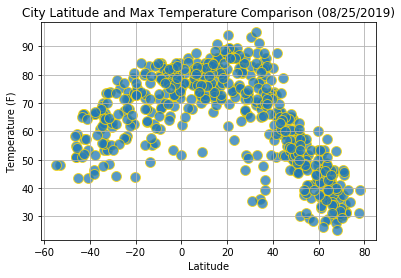

In [12]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Max Temp."], marker="o", s=100, alpha = 0.75, edgecolor = "gold")

#locating the graph properties
plt.title("City Latitude and Max Temperature Comparison (08/25/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Temperature Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Humidity Plot

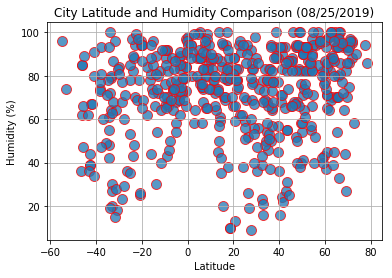

In [13]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Humidity"], marker="o", s=100, alpha = 0.75, edgecolor = "red")

#locating the graph properties
plt.title("City Latitude and Humidity Comparison (08/25/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Humidity Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Cloudiness Plot

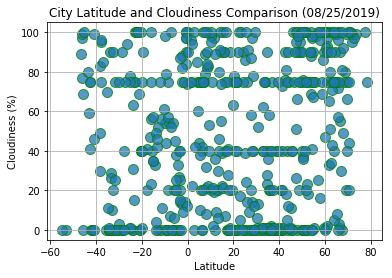

In [14]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Cloudiness"], marker="o", s=100, alpha = 0.75, edgecolor = "green")

#locating the graph properties
plt.title("City Latitude and Cloudiness Comparison (08/25/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Wind Speed Plot

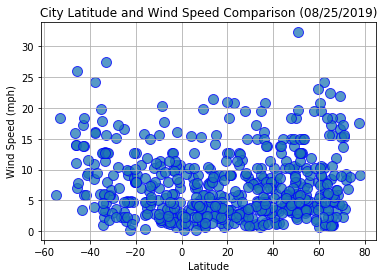

In [15]:
#creating the scatter plots
plt.scatter(weather_elements["Latitude"], weather_elements["Wind Speed"], marker="o", s=100, alpha = 0.75, edgecolor = "blue")

#locating the graph properties
plt.title("City Latitude and Wind Speed Comparison (08/25/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Winds Speed Plot.png")

#displaying the plot
plt.show()

THREE OBSERVABLE TRENDS 

The latitude vs. temperature plot tells us that, the max. temps increase from the poles towards the Equator in both North and South Hemisphere. This is called "Latitude Effect" in Geography (By the way, the cities in Southern Hemisphere have negative latitude numbers while the Northerners have positive). However, temperatures make a peak at around 20 degrees North latitude, not exactly at the equator line. This can be explained due to the different cooling and warming features of oceans and lands. Moreover, lands cover more areas in Nortern Hemisphere compared to the Southern one. Lands have low specific heat causing the existence more max. temps in the Northern Hemisphere.

It seems that there is no strong correlation between latitude and humidity. The related plot shows a great variety of values at the same or similar latitudes. However, the humidity rates are slightly  more in Norhern Hemisphere compared to the Southern Hemisphere. It can be explained by the existance of more cities in the Northern Hemisphere because the Northern Hemisphere one has more lands then the South Hemisphere.

Wind speed appears to vary between roughly 0-10 mph and has a tendency of slightly increasing from the equator towards the poles.
